# trial 마다 10s 히트맵 그리기 

In [1]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/session_3_clean.xlsx') # stimulus 시점 표시된 clean data 가져오기.
data

,Unnamed: 0,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,0,2022-07-17 23:59:20.523,0.227267,0.699052,0.294166,0.706565,0.369843,0
1,1,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0
2,2,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0
3,3,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0
4,4,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0
...,...,...,...,...,...,...,...,...
66235,66276,2022-07-18 00:03:39.157,0.593957,-0.029203,0.202880,0.268543,-0.067624,0
66236,66277,2022-07-18 00:03:39.157,0.593957,-0.029203,0.202880,0.268543,-0.067624,0
66237,66278,2022-07-18 00:03:39.158,0.593957,-0.029203,0.202880,0.268543,-0.067624,0
66238,66279,2022-07-18 00:03:39.158,0.593957,-0.029203,0.202880,0.268543,-0.067624,0


In [2]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,2022-07-17 23:59:20.523,0.227267,0.699052,0.294166,0.706565,0.369843,0
1,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0
2,2022-07-17 23:59:20.524,0.227267,0.699052,0.294166,0.706565,0.369843,0
3,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0
4,2022-07-17 23:59:20.525,0.227267,0.699052,0.294166,0.706565,0.369843,0


In [3]:
# 자극 시점 index 저장 (맨앞, 맨뒤 인덱스 포함)
point = []
point.append(0)
for i in range(len(data)) :
    if data['stimulus'][i] == 1:
        point.append(i)
point.append(len(data))
point

[0,
 6960,
 9780,
 12600,
 15408,
 18228,
 28716,
 31536,
 34352,
 37176,
 39984,
 50484,
 53292,
 56114,
 58932,
 61752,
 66240]

In [4]:
start_idx = point[1]
end_idx = point[2]
data_h = data[start_idx:end_idx]
data_h = data_h.drop('stimulus', axis = 1)
data_h = data_h.drop('TimeStamp', axis = 1)
data_h = data_h.drop('Delta_AF8', axis = 1)
data_h = data_h.drop('Theta_AF8', axis = 1)
data_h = data_h.drop('Gamma_AF8', axis = 1)

In [5]:
data_h_T = data_h.transpose()

In [6]:
data_h_T

,6960,6961,6962,6963,6964,6965,6966,6967,6968,6969,...,9770,9771,9772,9773,9774,9775,9776,9777,9778,9779
Alpha_AF8,0.063209,0.063209,0.063209,0.063209,0.063209,0.063209,0.063209,0.063209,0.063209,0.063209,...,0.094797,0.094797,0.094797,0.094797,0.094797,0.094797,0.094797,0.094797,0.094797,0.094797
Beta_AF8,0.521645,0.521645,0.521645,0.521645,0.521645,0.521645,0.521645,0.521645,0.521645,0.521645,...,0.370860,0.370860,0.370860,0.370860,0.370860,0.370860,0.370860,0.370860,0.370860,0.370860


Text(0.5, 57.5, 'Time')

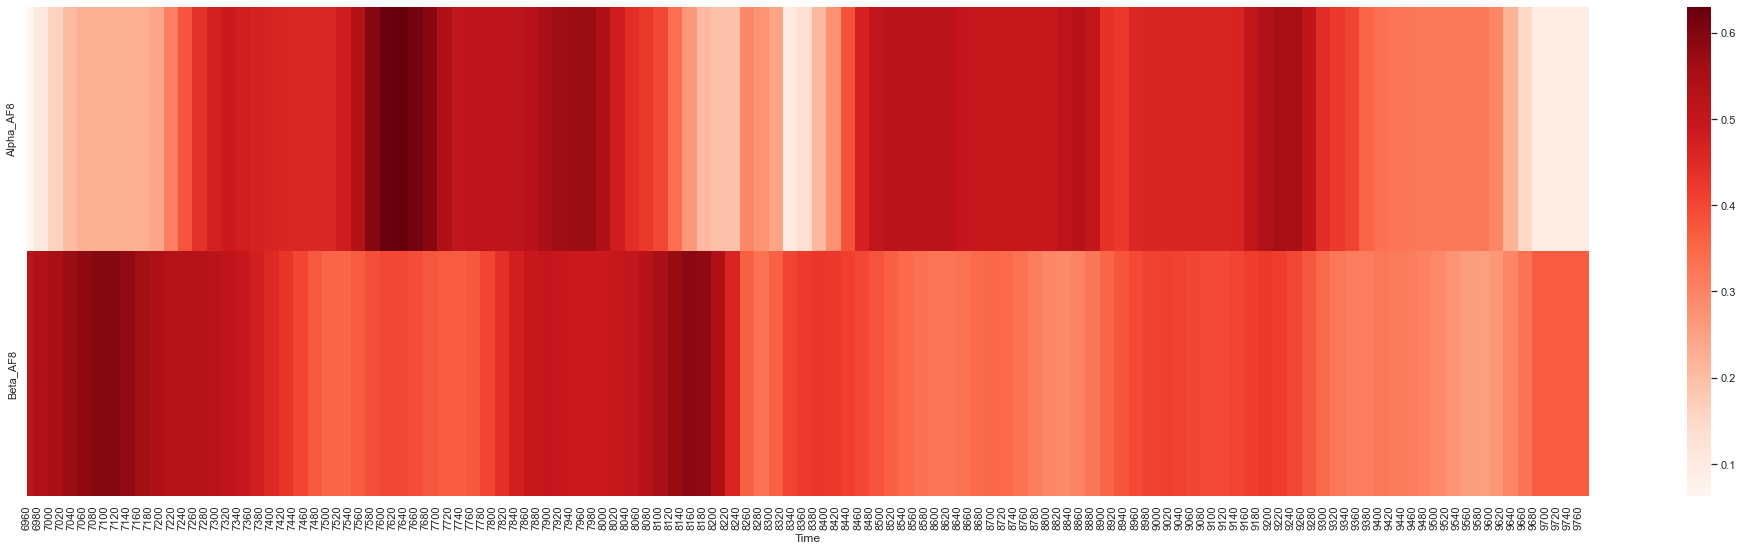

In [9]:
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(35,9)})
# ax=sns.heatmap(data_h_T, cmap='Reds', annot=True,xticklabels=xtime)
ax=sns.heatmap(data_h_T, cmap='Reds', annot=False)
plt.xlabel("Time")

In [10]:
sfig = ax.get_figure()
sfig.savefig('./분석 시각화/10_sec.png',  orientation="landscape") # 수정